# 페이지랭크 알고리즘 
- 사용자가 입력한 검색어의 맥락을 바탕으로 검색 결과의 중요도를 수치화 하는 알고리즘 
- 검색 결과, 검색된 페이지의 중요도를 계산하는 최적의 방법을 찾는 것 
- 특정한 페이지의 중요도를 0 ~ 1 사이의 숫자로 계산 
    1. 사용자가 입력한 검색어와 관련한 정보 
    - 입력한 검색어의 맥락과 검색된 페이지의 내용이 얼마나 밀접하게 연관되어 있는지 추정
    - 페이지 내용은 저자(author) 요소에 직접적인 영향을 준다
    -
    2. 사용자가 입력한 검색어와는 상관없는 정보
    - 페이지 링크, 조회수, 이웃의 맥락에서 페이지가 가진 중요도를 정량화
    - 평가 기준을 확립하기 어렵기 때문에 계산하기 쉽지 않음 

In [5]:
import numpy as np 
import networkx as nx 
import matplotlib.pyplot as plt  
%matplotlib inline 

In [9]:
myWeb = nx.DiGraph()
myPages = range(1, 5)

In [10]:
connections = [(1, 3), (2, 1), (2, 3), (3, 1), (3, 2), (3, 4), (4, 5), (5, 1), (5, 4)]
myWeb.add_nodes_from(myPages)
myWeb.add_edges_from(connections)

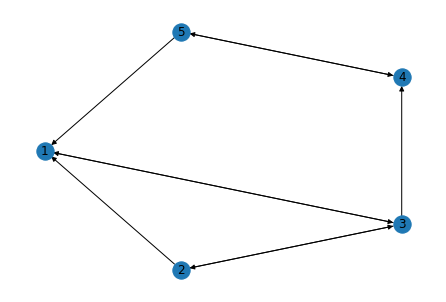

In [11]:
pos = nx.shell_layout(myWeb)
nx.draw(myWeb, pos, arrows = True, with_labels = True)
plt.show()

- 페이지랭크 알고리즘은 웹 페이지의 패턴을 transition matrix로 표현
- 전이 행렬의 크기는 n x n : 여기서 n은 노드의 개수 
- 전이 행렬에 담긴 수치는 노드에서 다른 노드로 이동할 확률 

In [12]:
# 전이 행렬을 생성하기 위한 함수 
def createPageRank(aGraph) :
    nodes_set = len(aGraph)
    M = nx.to_numpy_matrix(aGraph)
    outwards = np.squeeze(np.asarray(np.sum(M, axis = 1)))
    prob_outwards = np.array([1.0/count if count > 0 else 0.0 for count in outwards])
    G = np.asarray(np.multiply(M.T, prob_outwards))
    p = np.ones(nodes_set) / float(nodes_set)
    if np.min(np.sum(G, axis = 0)) < 1.0:
        print('경고 : 전이 확률 합의 최솟값이 1보다 작습니다.')
    return G, p

In [13]:
G, p = createPageRank(myWeb) 
print(G)

[[0.         0.5        0.33333333 0.         0.5       ]
 [0.         0.         0.33333333 0.         0.        ]
 [1.         0.5        0.         0.         0.        ]
 [0.         0.         0.33333333 0.         0.5       ]
 [0.         0.         0.         1.         0.        ]]


- 5 x 5 행렬, 전이 행렬의 각 열은 네트워크에 이는 각 노드 의미 
- 대각 성분이 0인 이유 : 자기 자신으로 되돌아오는 연결을 가진 노드가 없기 때문
- 0인 요소가 많은 sparse matrix, 노드 개수가 많아질수록 전이 확률이 0인 값이 늘어난다